In [224]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [225]:
train_dir="train"
test_dir="test"
train=pd.read_csv('train.csv')

df_test=pd.read_csv('sample_submission.csv')

In [226]:
train_imgs = os.listdir('./train')

In [227]:
print(train_imgs[0])

0004be2cfeaba1c0361d39e2b000257b.jpg


In [228]:
huhu = cv2.imread(train_dir + '/' +  train_imgs[0])

In [229]:
np.shape(huhu)

(32, 32, 3)

In [230]:
print(train_dir + '/' + train_imgs[0])

train/0004be2cfeaba1c0361d39e2b000257b.jpg


In [232]:
train = np.array([])
j = 0
start = time.time()
for i in train_imgs:
    a = cv2.imread(train_dir + '/' +  i)
    train = np.append(train, a)
    j += 1
    if j%1000 == 0:
        print(j)
        end = time.time()
        print(end  - start)
print(end - start)

KeyboardInterrupt: 

In [350]:
np.shape(train)

(2307072,)

In [ ]:
train_re  = train.reshape(17500,32,32,3)

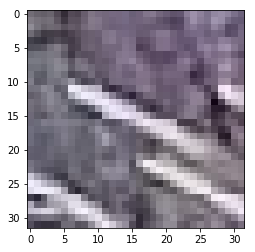

In [351]:
plt.imshow(np.array(train_re[1], np.int32))
plt.show()

In [ ]:
np.shape(train_re[0])

In [ ]:
label = pd.read_csv('train.csv')
label = label['has_cactus']
label = np.array(label)
np.shape(label)
label = np.reshape(label, (17500,))
np.shape(label)

In [352]:
np.shape(train_re)

(17500, 32, 32, 3)

In [292]:
valid_x = train_re[15500:16500]
valid_y = label[15500:16500]

In [293]:
test_x  = train_re[16500:17500]
test_y  = label[16500:17500]

In [294]:
train_x = train_re[0:15500]
train_y = label[0:15500]

In [342]:
dropout_dense_layer = 0.6
input_shape = (32,32,3)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, use_bias=False))
model.add(BatchNormalization(scale=False)) #CALL IT BEDORE ACTIVATION FUNCTION
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), use_bias=False))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), use_bias=False))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), use_bias=False))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), use_bias=False))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), use_bias=False))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), use_bias=False))
model.add(BatchNormalization(scale=False))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(dropout_dense_layer))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(dropout_dense_layer))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=25), 
                ModelCheckpoint(filepath='best_model2.h5', monitor='val_loss', save_best_only=True)]

In [343]:
model.fit(x = train_x, y = train_y, epochs = 10, callbacks=callbacks, validation_data=(valid_x, valid_y))

Train on 15500 samples, validate on 1000 samples
Epoch 1/10
15500/15500 [==============================] - 133s 9ms/sample - loss: 0.1330 - acc: 0.9488 - val_loss: 0.3261 - val_acc: 0.8720
Epoch 2/10
15500/15500 [==============================] - 121s 8ms/sample - loss: 0.0747 - acc: 0.9746 - val_loss: 0.0608 - val_acc: 0.9780
Epoch 3/10
15500/15500 [==============================] - 121s 8ms/sample - loss: 0.0569 - acc: 0.9825 - val_loss: 1.2122 - val_acc: 0.8400
Epoch 4/10
15500/15500 [==============================] - 122s 8ms/sample - loss: 0.0475 - acc: 0.9839 - val_loss: 3.0281 - val_acc: 0.7850
Epoch 5/10
15500/15500 [==============================] - 125s 8ms/sample - loss: 0.0361 - acc: 0.9889 - val_loss: 0.0469 - val_acc: 0.9840
Epoch 6/10
15500/15500 [==============================] - 133s 9ms/sample - loss: 0.0307 - acc: 0.9900 - val_loss: 0.0419 - val_acc: 0.9840
Epoch 7/10
15500/15500 [==============================] - 135s 9ms/sample - loss: 0.0326 - acc: 0.9901 - val_lo

In [353]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 30, 30, 32)        864       
_________________________________________________________________
batch_normalization_v1_127 ( (None, 30, 30, 32)        96        
_________________________________________________________________
activation_181 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 28, 28, 32)        9216      
_________________________________________________________________
batch_normalization_v1_128 ( (None, 28, 28, 32)        96        
_________________________________________________________________
activation_182 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 26, 26, 32)        9216      
__________

In [260]:
test_imgs = os.listdir('./test')
test = np.array([])
j = 0
start = time.time()
for i in test_imgs:
    a = cv2.imread(test_dir + '/' +  i)
    test = np.append(test, a)
    j += 1
    if j%1000 == 0:
        print(j)
        end = time.time()
        print(end  - start)
print(end - start)

1000
5.780534505844116
2000
19.91472315788269
3000
41.75529456138611
4000
71.3710663318634
71.3710663318634


In [261]:
test_re = test.reshape(4000, 32, 32, 3 )

In [344]:
submission_label = np.int16(np.round(model.predict(test_x)))

In [345]:
from sklearn.metrics import confusion_matrix


y_true = test_y
y_pred = submission_label
confusion_matrix(y_true, y_pred)



array([[246,   4],
       [  6, 744]], dtype=int64)

In [346]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       250
           1       0.99      0.99      0.99       750

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [347]:
accuracy = (201 + 745)  / (5 + 745 + 49 + 201)
accuracy

0.946

In [348]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.988

In [349]:

from sklearn.metrics import average_precision_score

average_precision_score(y_true, y_pred)

0.9926951871657754

In [263]:
submit = pd.DataFrame(test_imgs)

In [264]:
submit['has_cactus'] = np.round(submission_label)

In [265]:
submit.columns = ['id', 'has_cactus']

In [266]:
submit

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1.0
1,0017242f54ececa4512b4d7937d1e21e.jpg,1.0
2,001ee6d8564003107853118ab87df407.jpg,0.0
3,002e175c3c1e060769475f52182583d0.jpg,0.0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1.0
5,0038ed6f7417b8275b393307f66cb1e3.jpg,1.0
6,0059dfa41de4441fc23b9a4b98ba99cb.jpg,1.0
7,0061bd302d735db829418cb90b4e6040.jpg,1.0
8,00754573d8c7223e73da553dd43780bd.jpg,1.0
9,008d9fce71c8e03a4c9cdd15ea908573.jpg,0.0


In [269]:
submit.to_csv('submission cactus.csv', encoding='utf-8', index=False, sep =',')